In [1]:
import numpy as np
import pandas as pd

In [2]:
A = np.array([[3, 7],
              [-4, -6],
              [7, 8],
              [1, -1],
              [-4, -1],
              [-3, -7]]) 

In [3]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [4]:
A.shape

(6, 2)

In [5]:
df = pd.DataFrame(A, columns=['A0', 'A1'])

In [6]:
df

,A0,A1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [7]:
df.mean()

A0    0.0
A1    0.0
dtype: float64

In [8]:
df.std()

A0    4.472136
A1    6.324555
dtype: float64

In [9]:
df

,A0,A1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [10]:
a0 = df.A0

In [11]:
a0

0    3
1   -4
2    7
3    1
4   -4
5   -3
Name: A0, dtype: int32

In [12]:
a1=df.A1

In [13]:
a1

0    7
1   -6
2    8
3   -1
4   -1
5   -7
Name: A1, dtype: int32

In [14]:
# Finding covariences between the data set columns
# First method

np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [15]:
# Second method

np.sum(a0*a1)/5

25.0

In [16]:
# Third method
# Matrix transpose * matrix / (n-1)

A.T @ A / 5

array([[20., 25.],
       [25., 40.]])

In [17]:
# Eigen value and eigen vector - there is a possibility of showing data using some constant
# It is possible to represent a column in form of another column if we are able t find the value of constant
# T(v) = lambda * v

In [18]:
sigma = A.T @ A / 5

# This is the covarience matrix between a0 and a1

In [19]:
sigma

array([[20., 25.],
       [25., 40.]])

In [20]:
np.linalg.eig(sigma)

# This function will try and give us the eigen values and eigen vectors for the square matrix input.
# we are trying to get 2 values - PC1 and PC2


(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

In [21]:
# In the above output, the first array represents the eigen values. Since we have 2 columns and are using them we
# will be having 2 values - PC1 and PC2. Out of them, the higher magnitude value will be the PC1.
# So the value of lambda will be from the eigen values.

eigen_values,  eigen_vectors = np.linalg.eig(sigma)

In [22]:
eigen_values

array([ 3.07417596, 56.92582404])

In [23]:
eigen_vectors

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [24]:
sigma

array([[20., 25.],
       [25., 40.]])

In [25]:
# Based on the value of the eigen_values, the higher eigen value corresponds to PC1 and the corresponding 
# column values inside the eigen_vectors represent the PC1 compoments

print("First Principal component: ")
print(eigen_vectors[:,1])

First Principal component: 
[-0.56062881 -0.82806723]


In [26]:
print("Second Principal component: ")
print(eigen_vectors[:,0])

Second Principal component: 
[-0.82806723  0.56062881]


In [27]:
# Lets calculate sigma * eigen vector 1

sigma @ eigen_vectors[:,0]

array([-2.54562438,  1.72347161])

In [28]:
# Lets calculate sigma * eigen vector 2

sigma @ eigen_vectors[:,1]

array([-31.91425695, -47.13840945])

In [29]:
# Transformed data after multiplying the original data with PC1

PC1_arr = A @ eigen_vectors[:,1]
PC1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [30]:
# Transformed data after multiplying the original data with PC2

PC2_arr = A @ eigen_vectors[:,0]
PC2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

# Let's perform the PCA on the larger dataset

In [31]:
glass = pd.read_csv("glass_csv.csv", sep=",")

In [32]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,'vehic wind float'
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,'build wind non-float'
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,'build wind non-float'
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,'build wind non-float'


In [33]:
x = glass.drop(columns = ['Type'])

In [34]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24
...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00


In [35]:
y = glass[['Type']]

In [36]:
y

,Type
0,'build wind float'
1,'vehic wind float'
2,'build wind float'
3,tableware
4,'build wind non-float'
...,...
209,'vehic wind float'
210,'build wind non-float'
211,'build wind non-float'
212,'build wind non-float'


In [37]:
x.describe()

# As we see that the mean of all columns is not 0 and also sd is not 1
# We will standardise using StandardScaler

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_x_arr = scaler.fit_transform(x)

In [40]:
scaled_x_df = pd.DataFrame(scaled_x_arr)
scaled_x_df

,0,1,2,3,4,5,6,7,8
0,-0.143715,-0.758384,0.566677,-0.652289,0.490551,0.219689,-0.131680,-0.352877,-0.586451
1,-0.638803,-1.531681,0.580575,-0.190536,0.309376,0.112107,-0.300715,-0.352877,-0.586451
2,-0.143715,-0.242853,0.552779,-0.070079,-0.014151,0.142844,-0.371146,-0.352877,-0.586451
3,-1.774207,1.217820,-0.656366,0.190912,2.457593,-0.763919,-0.962769,-0.352877,-0.586451
4,5.137232,-1.359837,-1.865511,-0.893204,-3.223534,-0.579492,5.094318,-0.352877,1.882411
...,...,...,...,...,...,...,...,...,...
209,-0.747723,0.014913,0.497186,-0.451527,0.050555,0.142844,-0.448621,-0.352877,-0.586451
210,-0.807133,-0.672462,0.580575,1.355332,0.011732,0.296533,-0.695130,-0.352877,-0.586451
211,-0.737821,0.628641,0.580575,-0.391299,0.296435,-0.195271,-0.716259,-0.352877,0.853719
212,-0.486976,-0.905679,0.135832,0.532207,0.723490,0.358008,-0.293672,-0.352877,-0.586451


In [41]:
scaled_x_df.describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.876301e-14,2.201769e-15,2.233416e-16,-3.130933e-16,9.635335e-16,-1.867665e-17,-3.265820e-16,-4.617283e-17,-3.320293e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [42]:
sigma = (scaled_x_df.T @ scaled_x_df) / (scaled_x_df.shape[0] - 1)

In [43]:
sigma

# sigma is the covarience matrix

,0,1,2,3,4,5,6,7,8
0,1.004695,-0.192786,-0.122848,-0.409238,-0.544597,-0.291193,0.814207,-0.000388,0.143681
1,-0.192786,1.004695,-0.275017,0.157530,-0.070137,-0.267336,-0.276736,0.328136,-0.242479
2,-0.122848,-0.275017,1.004695,-0.484060,-0.166706,0.005421,-0.445833,-0.494573,0.083449
3,-0.409238,0.157530,-0.484060,1.004695,-0.005550,0.327489,-0.260811,0.481655,-0.074751
4,-0.544597,-0.070137,-0.166706,-0.005550,1.004695,-0.194239,-0.209712,-0.102631,-0.094643
5,-0.291193,-0.267336,0.005421,0.327489,-0.194239,1.004695,-0.319328,-0.042818,-0.007755
6,0.814207,-0.276736,-0.445833,-0.260811,-0.209712,-0.319328,1.004695,-0.113371,0.125555
7,-0.000388,0.328136,-0.494573,0.481655,-0.102631,-0.042818,-0.113371,1.004695,-0.058967
8,0.143681,-0.242479,0.083449,-0.074751,-0.094643,-0.007755,0.125555,-0.058967,1.004695


In [44]:
eigen_values_new, eigen_vectors_new = np.linalg.eig(sigma)

In [45]:
eigen_values_new

# Eigen values must be equal to the number of columns used

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

In [46]:
eigen_vectors_new

array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
        -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
       [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
         0.55811757, -0.14858006, -0.12769315, -0.31193718],
       [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
        -0.30818598,  0.20604537, -0.07689061, -0.57727335],
       [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
         0.01885731,  0.69923557, -0.27444105, -0.19222686],
       [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
        -0.08609797, -0.21606658, -0.37992298, -0.29807321],
       [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
         0.24363237, -0.50412141, -0.10981168, -0.26050863],
       [-0.49230609,  0.3453798 , -0.00098473,  0.27644322,  0.18818774,
         0.14866937,  0.09913463,  0.39870468, -0.57932321],
       [ 0.25037512,  0.48470218,  0.07405473, -0.13317545, -0

In [47]:
temp = pd.DataFrame(eigen_vectors_new)
temp

,0,1,2,3,4,5,6,7,8
0,-0.545177,0.285683,0.086911,-0.147381,0.073543,-0.115288,-0.081867,-0.752216,0.025732
1,0.258126,0.270350,-0.384920,-0.491242,-0.153683,0.558118,-0.148580,-0.127693,-0.311937
2,-0.110881,-0.593558,0.008418,-0.378786,-0.123509,-0.308186,0.206045,-0.076891,-0.577273
3,0.428709,0.295212,0.329237,0.137506,-0.014109,0.018857,0.699236,-0.274441,-0.192227
4,0.228836,-0.155099,-0.458709,0.652538,-0.008500,-0.086098,-0.216067,-0.379923,-0.298073
5,0.219344,-0.153970,0.662574,0.038535,0.307040,0.243632,-0.504121,-0.109812,-0.260509
6,-0.492306,0.345380,-0.000985,0.276443,0.188188,0.148669,0.099135,0.398705,-0.579323
7,0.250375,0.484702,0.074055,-0.133175,-0.251334,-0.657219,-0.351783,0.144932,-0.198228
8,-0.185842,-0.062039,0.284451,0.230492,-0.873264,0.243044,-0.073721,-0.016271,-0.014669


In [48]:
# Since the 1st eigen value is the highest value - it forms the PC1.
# Hence we will use this eigen value and the 1st eigen verctor for finding the transformed data
# Rotation is the multiplication of the datset with the eigen vector

pc1_transformed_data = scaled_x_df @ eigen_vectors_new[:,0]

In [49]:
pc1_transformed_data.shape

(214,)

In [50]:
pc1_transformed_data

0     -0.213979
1      0.070901
2      0.155774
3      2.325668
4     -7.138698
         ...   
209    0.447183
210    1.213698
211    0.462998
212    0.654109
213    0.144390
Length: 214, dtype: float64

In [51]:
pc2_transformed_data = scaled_x_df @ eigen_vectors_new[:,1]

In [52]:
pc2_transformed_data

0     -1.065052
1     -1.301203
2     -0.738150
3     -0.462400
4      4.004437
         ...   
209   -0.957422
210   -0.779098
211   -0.988247
212   -0.710903
213    0.639849
Length: 214, dtype: float64

# Now we need to validate whether the PC is real and correct

In [53]:
# We can check whether the 2 PC are orthogonal to each other or not (Matrix multiplication will lead to 0)

In [54]:
# We can also check wth the PCA module in sklearn library.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [55]:
pca.fit_transform(scaled_x_df)

array([[ 2.13978802e-01, -1.06505169e+00],
       [-7.09007624e-02, -1.30120252e+00],
       [-1.55773980e-01, -7.38149546e-01],
       [-2.32566823e+00, -4.62400329e-01],
       [ 7.13869786e+00,  4.00443669e+00],
       [-2.26479128e-02, -8.10349081e-01],
       [ 5.95438880e-01, -9.54422853e-01],
       [ 1.81361046e-01, -4.09957896e-01],
       [-2.29846438e+00,  2.21466938e+00],
       [ 6.14443758e-01, -1.09156288e+00],
       [-6.19527617e-01, -8.77061910e-01],
       [ 6.13895376e-01, -1.40234153e+00],
       [ 2.07281161e+00, -1.93673881e-01],
       [ 1.74711568e+00, -1.83206568e-01],
       [-3.15800764e-01, -7.53169864e-01],
       [-7.81415457e-01, -6.41887105e-01],
       [-2.08135612e+00,  3.07840526e+00],
       [-6.55247560e-01, -1.14303255e+00],
       [ 5.44543846e-01,  1.76724509e+00],
       [-1.33583022e-01, -4.11998638e-01],
       [ 2.09535866e+00, -4.27013874e-01],
       [ 3.33328693e+00,  2.02616879e+00],
       [ 9.91658801e-01, -1.02189999e+00],
       [ 3.

In [56]:
scaled_x_df

,0,1,2,3,4,5,6,7,8
0,-0.143715,-0.758384,0.566677,-0.652289,0.490551,0.219689,-0.131680,-0.352877,-0.586451
1,-0.638803,-1.531681,0.580575,-0.190536,0.309376,0.112107,-0.300715,-0.352877,-0.586451
2,-0.143715,-0.242853,0.552779,-0.070079,-0.014151,0.142844,-0.371146,-0.352877,-0.586451
3,-1.774207,1.217820,-0.656366,0.190912,2.457593,-0.763919,-0.962769,-0.352877,-0.586451
4,5.137232,-1.359837,-1.865511,-0.893204,-3.223534,-0.579492,5.094318,-0.352877,1.882411
...,...,...,...,...,...,...,...,...,...
209,-0.747723,0.014913,0.497186,-0.451527,0.050555,0.142844,-0.448621,-0.352877,-0.586451
210,-0.807133,-0.672462,0.580575,1.355332,0.011732,0.296533,-0.695130,-0.352877,-0.586451
211,-0.737821,0.628641,0.580575,-0.391299,0.296435,-0.195271,-0.716259,-0.352877,0.853719
212,-0.486976,-0.905679,0.135832,0.532207,0.723490,0.358008,-0.293672,-0.352877,-0.586451


In [57]:
# SCREEN PLOT for determining the number of features to use

pca_features = PCA()

In [58]:
principal_component = pca_features.fit_transform(scaled_x_df)

In [59]:
import matplotlib.pyplot as plt

In [60]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'EVR')

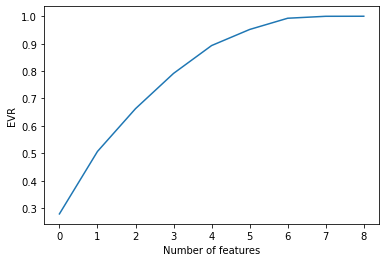

In [61]:
plt.plot(np.cumsum(pca_features.explained_variance_ratio_))
plt.xlabel("Number of features")
plt.ylabel("EVR")

In [62]:
# As we can see from the above graph, we can see that for around 5 or 6 features are enough to describe the dataset.